In [61]:
library(readr)   
library(dplyr)   
library(ggplot2) 
library(reshape2)
library(tidyverse)
library(ggplot2)

state_variable_data <- read_csv("state_variable_data.csv")
head(state_variable_data)

numeric_data <- state_variable_data |>
  select_if(is.numeric)
  
numeric_data <- numeric_data |>
    select(-state)

Rows: 50 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): voted_2020
dbl (7): state, protests_per_100k, polarization_var, diversity_index, educat...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


state,voted_2020,protests_per_100k,polarization_var,diversity_index,education_index,economic_index,turnout_rate
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Republican,7.284627,0.13333237,53.1,63.93333,78.68990,35.87
2,Republican,9.135645,0.02205297,62.8,70.33333,89.14633,47.92
4,Democrat,6.180520,0.19872212,61.5,65.83333,83.62785,44.67
5,Republican,6.740773,0.08151470,49.8,63.16667,76.76303,38.84
6,Democrat,13.905531,0.53408166,69.7,64.16667,87.07850,36.51
8,Democrat,7.707344,0.16659249,52.3,73.80000,89.97153,54.76


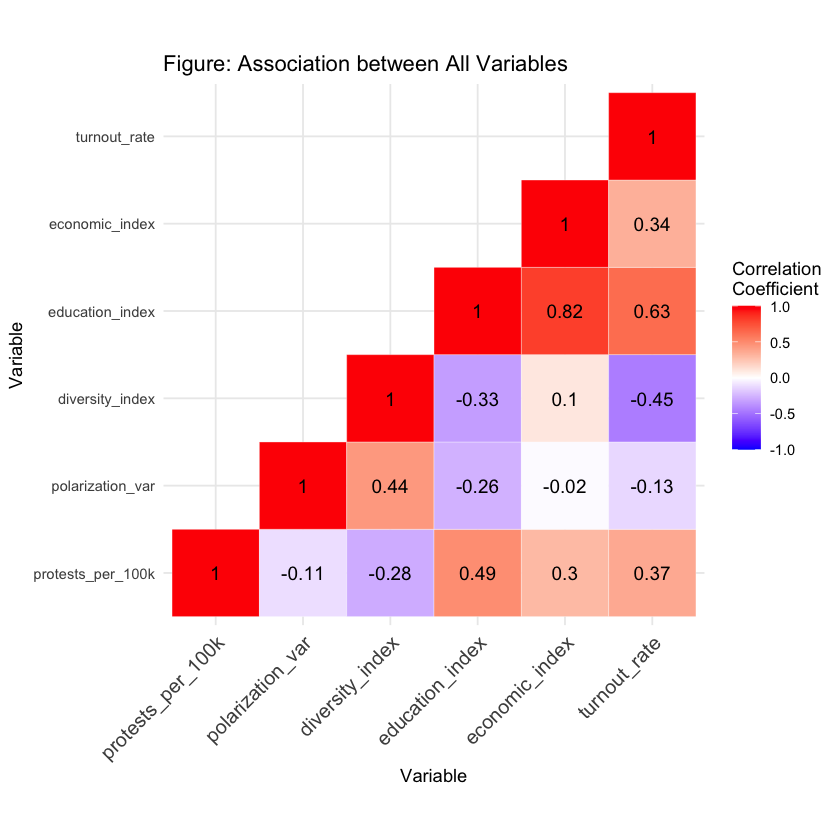

In [62]:
corr_matrix <- cor(numeric_data, use = "complete.obs")

get_lower_tri <- function(corr_matrix) {
  corr_matrix[upper.tri(corr_matrix)] <- NA
  return(corr_matrix)
}

corr_mat <- melt(get_lower_tri(corr_matrix), na.rm = TRUE)

ggplot(data = corr_mat, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                       midpoint = 0, limit = c(-1,1), space = "Lab", 
                       name="Correlation\nCoefficient") +
  theme_minimal() + 
  theme(axis.text.x = element_text(angle = 45, vjust = 1, 
                                   size = 12, hjust = 1)) +
  geom_text(aes(x = Var1, y = Var2, label = round(value, 2)), color = "black", size = 4) + 
  labs(title = "Figure: Association between All Variables", x = "Variable", y = "Variable") +
  coord_fixed()

In [63]:
model_1 <- lm(protests_per_100k ~ polarization_var + education_index, data = state_variable_data)
summary(model_1)


Call:
lm(formula = protests_per_100k ~ polarization_var + education_index, 
    data = state_variable_data)

Residuals:
   Min     1Q Median     3Q    Max 
-7.787 -2.853 -1.106  2.141 16.640 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -44.5779    15.2204  -2.929 0.005234 ** 
polarization_var   0.8310     6.2188   0.134 0.894269    
education_index    0.8121     0.2177   3.731 0.000514 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.053 on 47 degrees of freedom
Multiple R-squared:  0.2381,	Adjusted R-squared:  0.2056 
F-statistic: 7.343 on 2 and 47 DF,  p-value: 0.001679


In [64]:
model_2 <- lm(protests_per_100k ~ polarization_var + diversity_index, data = state_variable_data)
summary(model_2)


Call:
lm(formula = protests_per_100k ~ polarization_var + diversity_index, 
    data = state_variable_data)

Residuals:
   Min     1Q Median     3Q    Max 
-5.670 -3.673 -1.939  1.735 18.596 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      16.61501    2.79848   5.937 3.35e-07 ***
polarization_var  0.67403    7.34043   0.092   0.9272    
diversity_index  -0.11207    0.06081  -1.843   0.0716 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.556 on 47 degrees of freedom
Multiple R-squared:  0.07899,	Adjusted R-squared:  0.0398 
F-statistic: 2.016 on 2 and 47 DF,  p-value: 0.1446


In [65]:
state_variable_data$voted_category = ifelse(state_variable_data$voted_2020 == 'Democrat', 'Democrat', 'Republican')
state_variable_data$voted_category <- as.factor(state_variable_data$voted_category)

model_x <- lm(protests_per_100k ~ polarization_var + voted_category, data = state_variable_data)
summary(model_x)


Call:
lm(formula = protests_per_100k ~ polarization_var + voted_category, 
    data = state_variable_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.8219 -2.4828 -0.5041  1.8357 17.3632 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)                15.876      1.370  11.587 2.24e-15 ***
polarization_var           -9.426      5.704  -1.653    0.105    
voted_categoryRepublican   -6.387      1.358  -4.702 2.29e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.744 on 47 degrees of freedom
Multiple R-squared:  0.3284,	Adjusted R-squared:  0.2998 
F-statistic: 11.49 on 2 and 47 DF,  p-value: 8.661e-05


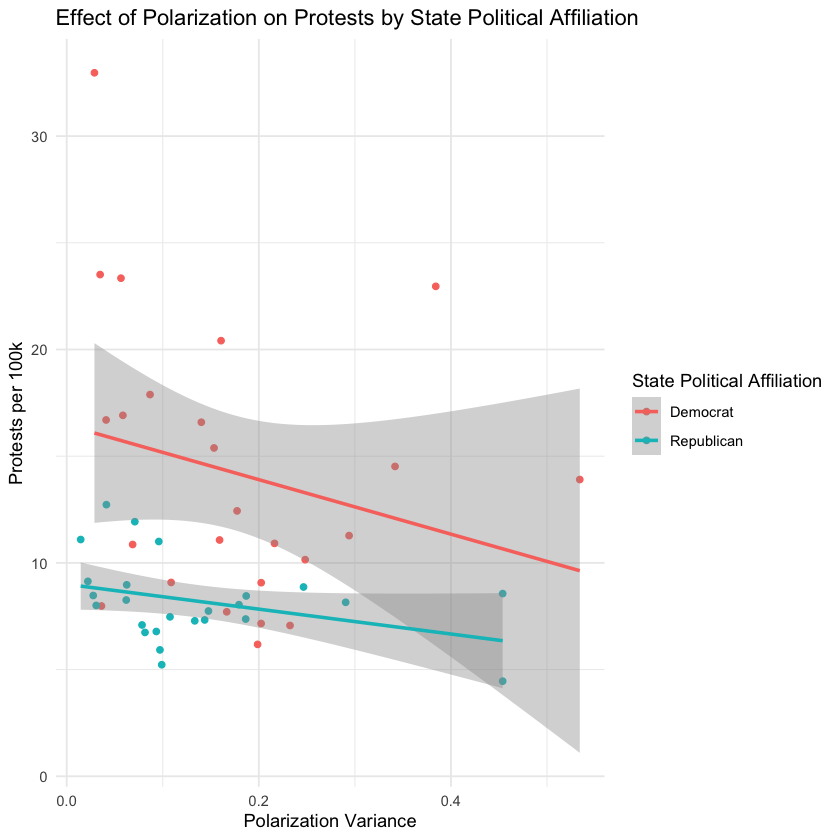

In [66]:
ggplot(state_variable_data, aes(x = polarization_var, y = protests_per_100k, color = voted_category)) +
    geom_point() +
    geom_smooth(method = "lm", formula = y ~ x) +
    labs(title = "Effect of Polarization on Protests by State Political Affiliation",
         x = "Polarization Variance",
         y = "Protests per 100k",
         color = "State Political Affiliation") +
    theme_minimal()

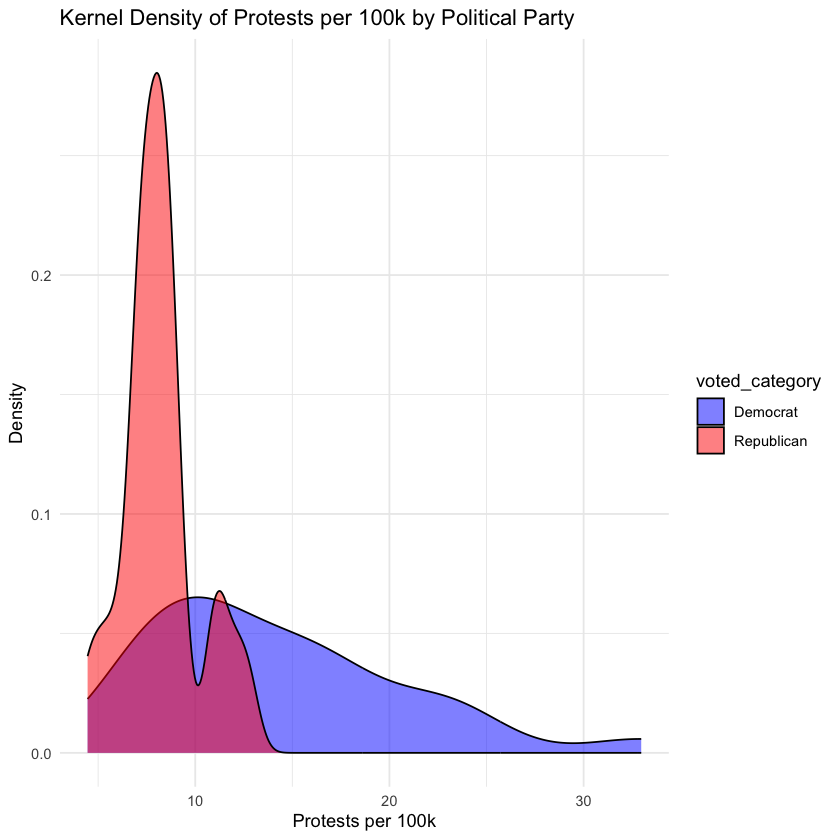

In [58]:
state_variable_data$voted_category <- as.factor(state_variable_data$voted_category)

ggplot(state_variable_data, aes(x = protests_per_100k, fill = voted_category)) +
  geom_density(alpha = 0.5) +  # Adjust alpha for transparency to see overlap
  labs(title = "Kernel Density of Protests per 100k by Political Party",
       x = "Protests per 100k",
       y = "Density") +
  scale_fill_manual(values = c("Democrat" = "blue", "Republican" = "red")) +  # Customize colors if needed
  theme_minimal()